In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns

In [2]:
from sklearn.cluster import KMeans

In [16]:
univ = pd.read_csv(r"C:\Users\91863\Downloads\Universities (1).csv")

In [17]:
# NOrmalisation function
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaled_univ_df = scaler.fit_transform(univ.iloc[:,1:])

In [ ]:
# how to find optimum number of cluster
# the Kmeans algorithms aims to choose centroids that minimise the inertia, or within-cluster sum of square   

C:\Users\91863\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\91863\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\91863\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\91863\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The defa

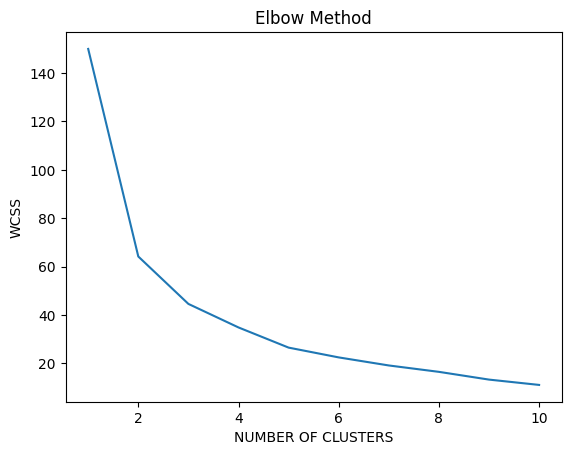

In [18]:
wcss = []
for i in range(1,11):
    kmeans= KMeans(n_clusters = i,random_state=0)
    kmeans.fit(scaled_univ_df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title("Elbow Method")
plt.xlabel("NUMBER OF CLUSTERS")
plt.ylabel("WCSS")
plt.show()

In [19]:
# BUild cluster algorithm
from sklearn.cluster import KMeans
cluster_new= KMeans(4,random_state=42)   # 42 is a random number 
cluster_new.fit(scaled_univ_df)

C:\Users\91863\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=42)

In [20]:
cluster_new.labels_

array([1, 3, 2, 1, 2, 1, 1, 2, 1, 3, 1, 2, 2, 0, 1, 0, 1, 0, 2, 2, 2, 2,
       2, 0, 1])

In [22]:
# assign clusters to the data set
univ["clusterid_new"]= cluster_new.labels_

In [13]:
univ.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clusterid_new
0,Brown,1310,89,22,13,22704,94,1
1,CalTech,1415,100,25,6,63575,81,3
2,CMU,1260,62,59,9,25026,72,2
3,Columbia,1310,76,24,12,31510,88,1
4,Cornell,1280,83,33,13,21864,90,2


In [23]:
# these are standard values
cluster_new.cluster_centers_

array([[-1.93029211, -1.98148647,  1.59348244,  1.63857398, -1.23359906,
        -1.68680366],
       [ 0.80273428,  0.68086062, -0.90136381, -0.43159988,  0.44062556,
         0.79526289],
       [-0.12658888,  0.06407139,  0.2224667 ,  0.04516743, -0.38064332,
         0.02028221],
       [ 0.88122441,  0.5787432 , -0.24316128, -1.56078563,  2.38759968,
        -0.3064867 ]])

In [27]:
univ.drop(columns="Univ").groupby("clusterid_new").agg(["mean"]).reset_index()

,clusterid_new,SAT,Top10,Accept,SFRatio,Expenses,GradRate
,,mean,mean,mean,mean,mean,mean
0,0,1061.500000,38.750000,70.000000,19.25,9953.000000,71.750000
1,1,1351.666667,89.444444,21.777778,11.00,33615.555556,93.777778
2,2,1253.000000,77.700000,43.500000,12.90,22008.200000,86.900000
3,3,1360.000000,87.500000,34.500000,6.50,61133.000000,84.000000


In [28]:
univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clusterid_new
0,Brown,1310,89,22,13,22704,94,1
1,CalTech,1415,100,25,6,63575,81,3
2,CMU,1260,62,59,9,25026,72,2
3,Columbia,1310,76,24,12,31510,88,1
4,Cornell,1280,83,33,13,21864,90,2
5,Dartmouth,1340,89,23,10,32162,95,1
6,Duke,1315,90,30,12,31585,95,1
7,Georgetown,1255,74,24,12,20126,92,2
8,Harvard,1400,91,14,11,39525,97,1
9,JohnsHopkins,1305,75,44,7,58691,87,3
